In [268]:
# Import libraries and modules needed to run the code
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics

Reading the data

In [269]:
white_wine = pd.read_csv('winequality-white.csv', sep=";")

# Exploratary Analysis

This section will include information about the data and the attributesand what type the attributes are.

In [270]:
# Exploratary analysis

# Info about the attributes in the data and what type they are
# Also see how many rows there are in the data set overall
# We can see here also that there are no missing values as the non-null 
# count is the same as the total instances in the data set
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


As we can see from this there are a total number of 12 attributes, none of them include a missing value and all of them are of type float64 but the 12th attribute 'quality' is of type int64, integer value.
We can also see that there are a total number of 4898 instances in the dataset overall

To understand the data set further we will check on duplicates within the data set and if there are any then drop them.

In [271]:

# Check if there are any duplicates
print("Duplucated sum: " ,white_wine.duplicated().sum()) 
white_wine = white_wine.drop_duplicates()
white_wine.info()

Duplucated sum:  937
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3961 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 402.3 KB


In [272]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Here we can detect if there are any outliers in the data set by comparing where 75%, 50%, 25% of the data is to the max and/or min value.
As we can clearly see, some attributes have some kind of outliers within them.

We can also see that the mean is more than median in all columns which is a strong indecation of outliers in the data set.

The attributes we want to check further are as follows:
* Residual sugar
* Free sulfur dioxide

Next we are going to look at those attributes further by plotting boxplots for each of them.

<AxesSubplot:>

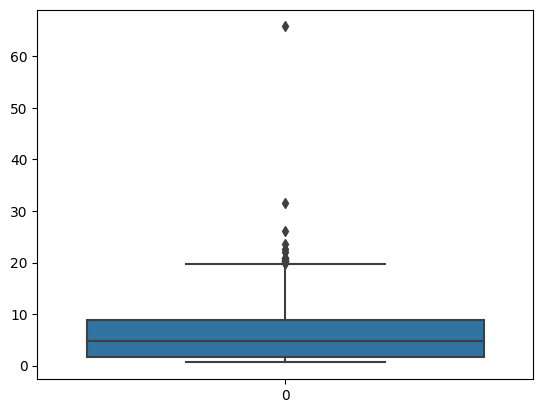

In [273]:
sns.boxplot(white_wine['residual sugar'])

<AxesSubplot:>

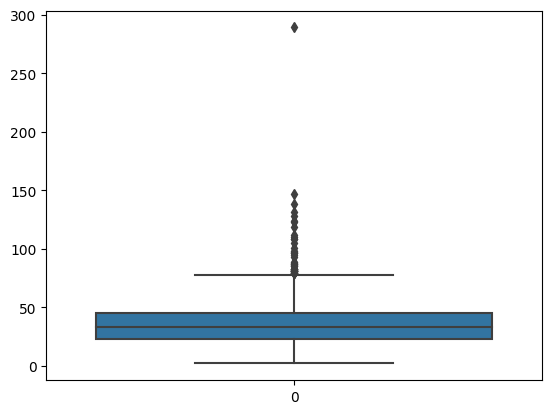

In [274]:
sns.boxplot(white_wine['free sulfur dioxide'])

In [275]:
# Eliminating outliers
z = np.abs(stats.zscore(white_wine))
white_wine = white_wine[(z < 3).all(axis=1)]
white_wine.shape

(3620, 12)

In the dataset all of the attributes are of a numerical value (float) but one, quality, which has an integer value ranging from 1 - 10. Where the numbers represent the quality of the wine. In the data set there is no wine with the quality value of 10 but we are still going to include that as that might happen. Because of this we are going to classify the quality of the wine into words instead of a numerical value.

Next we are going to change the quality attribute and create a new attribute called quality class.
The quality class attribute is going to represent the ranking of wine quality in 3 categories:
* 0 - 4 = 'Poor'
* 5 - 6 = 'Good'
* 7 - 10 = 'Excellent'

In [276]:
# Class labeling 
def change_quality_to_class(row):
    if int(row['quality']) in range(0,5):
        return 'poor'
    elif int(row['quality']) in range(5,7):
        return 'good'
    elif int(row['quality']) in range(7,11):
        return 'excellent'

white_wine['quality class'] = white_wine.apply(lambda row: change_quality_to_class(row), axis=1)

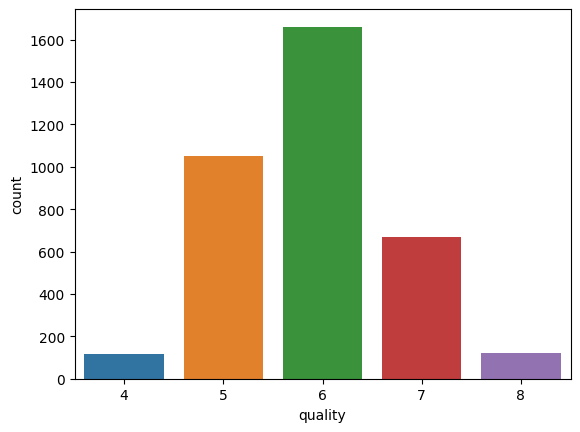

In [277]:
# Class frequency of the attribute quality
sns.countplot(x=white_wine["quality"])
plt.show()

Here we can see the distribution of the quality values within the data set.

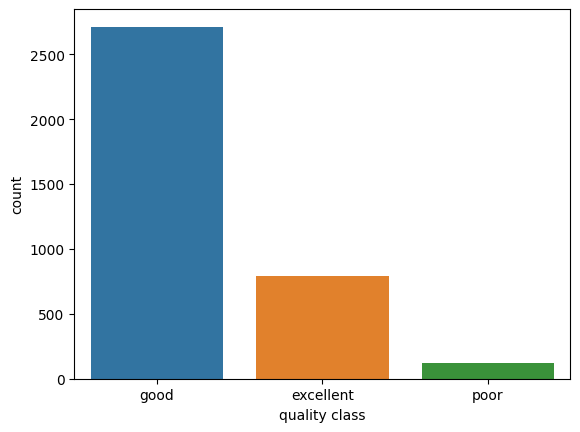

In [278]:
sns.countplot(x=white_wine["quality class"])
plt.show()

Another plot showing the class distribution after creating another attribute, quality class, and can clearly see that there is a major class imbalance within the data set.

<AxesSubplot:>

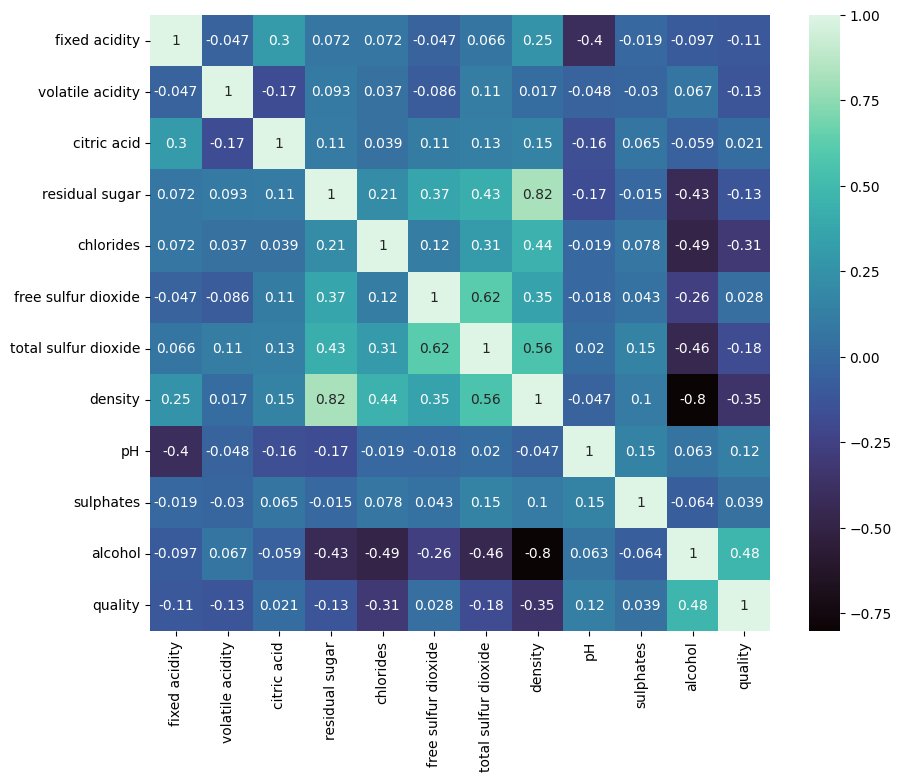

In [279]:
# Correlation analysis
corr = white_wine.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap="mako", annot=True, )

From this picture we want to especially look at the attribute quality and see which attribute correlates most with that, no matter if it is negative correlation or positive correlation.

* Alcohol has the most correlation with quality
* The attributes which have almost no correlation with the quality attribute: 
    * Citric Acid
    * Fixed Acidity
    * Sulphates
    * Free sulfur dioxide

Because of this analysis we can look more in depth of the correlation between the new attribute we just created, class level, and the attributes which have almost no correlation with the old quality attribute.

After seeing the correlation plot and creating the new attribute 'quality class' we can now also finally drop the column 'quality' so it wont affect our training and tests.


In [280]:
del white_wine['quality']

<AxesSubplot:xlabel='quality class', ylabel='alcohol'>

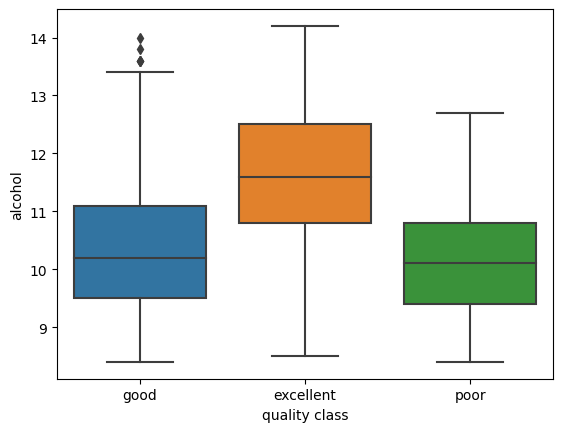

In [281]:
sns.boxplot(x=white_wine['quality class'], y=white_wine['alcohol'])

<AxesSubplot:xlabel='quality class', ylabel='citric acid'>

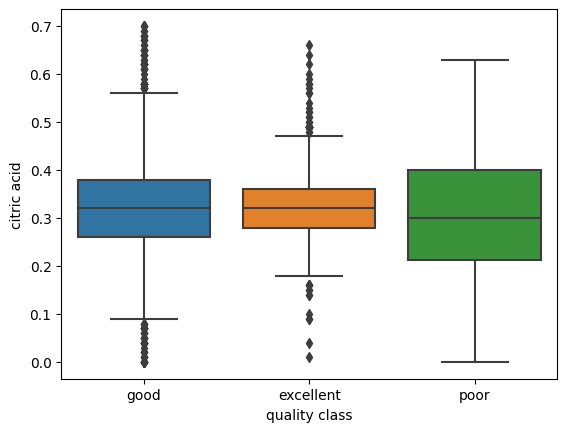

In [282]:
sns.boxplot(x=white_wine['quality class'], y=white_wine['citric acid'])

<AxesSubplot:xlabel='quality class', ylabel='fixed acidity'>

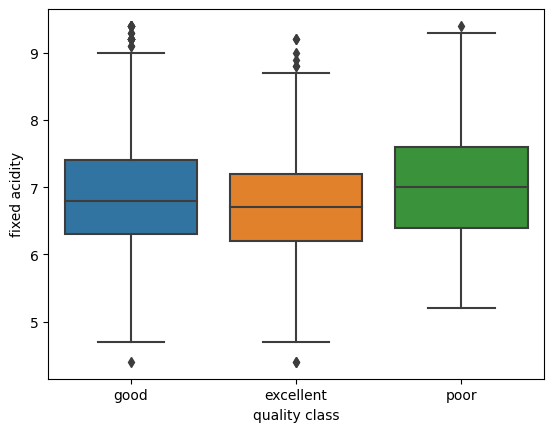

In [283]:
sns.boxplot(x=white_wine['quality class'], y=white_wine['fixed acidity'])

<AxesSubplot:xlabel='quality class', ylabel='sulphates'>

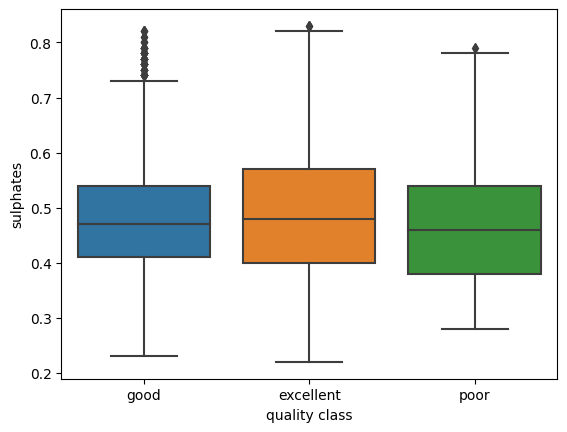

In [284]:
sns.boxplot(x=white_wine['quality class'], y=white_wine['sulphates'])

<AxesSubplot:xlabel='quality class', ylabel='free sulfur dioxide'>

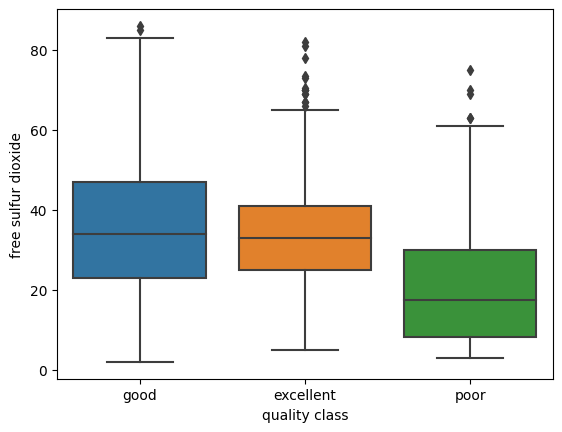

In [285]:
sns.boxplot(x=white_wine['quality class'], y=white_wine['free sulfur dioxide'])

First we will split the data into test and training tests and defining features for X and the target Y.
* The test data is going to be 20% of all the data and 80% is going to be for the training

Also we are going to standardize the dataset.

In [286]:
import numpy as np
# Features X
X = np.asarray(white_wine.iloc[:,:-1])

# Target y
y = np.asarray(white_wine['quality class'])

In [287]:
# Standardize
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)

In [288]:
# Splitting data into train and test 
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

Next we are going to train different classification algorithms and choose the one with the best results. The best results are measured with the accuracy.

The classification algorithms we are going to test:
* K-nearest neighbors (Knn)
    * We are going to test cross validation for the Knn
* Decision Tree
* Random Forest

The reason we are not testing regression models is because we changed the quality attribute.


Starting with the Knn. To classify a record with Knn it computes the distance to other training records, identifies the k nearest neighbors and then uses class labels of the nearest neighbors to determine the class label by taking the majority vote.

Most problems with choosing the value of k for the algortihm is that if k is to small it is sensitive to noise points and if it is too large it may include points from the other classes e.g. points that are irrelevant.

Good thing to mention is that the reason we scaled the data before going into testing the models is that when testing the Knn and looking at the numbers of which each point represents in the exploratory chapter is that some values are way bigger than others. Scaling is a good thing to prevent distance measures from being dominated by one of the attributes in the data.

This algorithm requires three things:
* The set of labeled records
* Distance metric to compute distance between records
* The value of k, the number of nearest neighbors to retrieve.

In [289]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# First define the numbers of which we are going to test the value of k's
k_numbers_range = range(1, 30)

# A list to include all the scores and then plot from that list to see which k is the most efficient
scores_list = []

for k in k_numbers_range:
    Knn = KNeighborsClassifier(n_neighbors=k)

    # Use 15fold cross validation with 'accuracy' as scoring method
    scores = cross_val_score(Knn, X, y, cv=15, scoring='accuracy')
    scores_list.append(scores.mean())

Next we plot to see if which K to use in training the data

<AxesSubplot:>

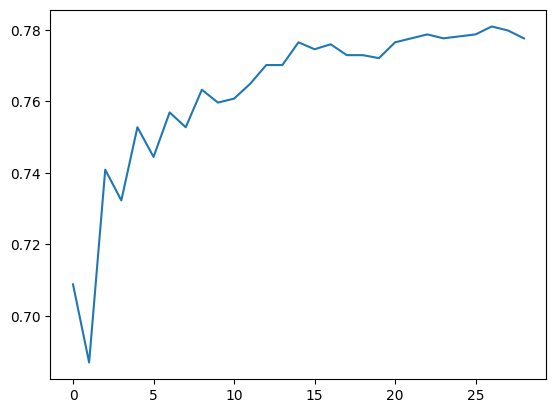

In [290]:
import matplotlib.pyplot as plt


sns.lineplot(scores_list)

We can see from the plot that when K = 26 is an optimal number to use for the classification

Next we train this model and predict when k = 26.

In [299]:
from sklearn.metrics import accuracy_score

# Training Knn
Knn = KNeighborsClassifier(n_neighbors=26)
Knn.fit(X_train, y_train)
y_pred = Knn.predict(X_test)

print(y_pred)


['good' 'good' 'good' 'good' 'good' 'good' 'good' 'excellent' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'excellent' 'good' 'good'
 'good' 'good' 'excellent' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'excellent' 'good' 'excellent' 'good' 'excellent' 'excellent'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'excellent'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'excellent'
 'good' 'good' 'good' 'good' 'good' 'excellent' 'excellent' 'excellent'
 'good' 'good' 'excellent' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'excellent' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'excellent'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'excellent' 'good'
 'good' 'good' 'good' 'e

Here we can see that our y_pred can predict the quality of our wine. Next step is to test the accuracy of this classifier.

In [302]:
from sklearn.metrics import accuracy_score

# Classification report
print(metrics.classification_report(y_test, y_pred, zero_division=1))
# CV score
accuracy = cross_val_score(Knn, X, y, scoring='accuracy', cv=15)
print('Cross validation score: ', accuracy.mean())

              precision    recall  f1-score   support

   excellent       0.65      0.35      0.45       157
        good       0.81      0.94      0.87       545
        poor       1.00      0.00      0.00        22

    accuracy                           0.79       724
   macro avg       0.82      0.43      0.44       724
weighted avg       0.78      0.79      0.75       724

Cross validation score:  0.7787181509550426


From this we can see that our accuracy with Knn is 77.5% but that is misleading because of major class imbalance as we saw in a plot earlier.


# Decision Tree Classifier

Some text about decision tree classifier

In [303]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print(y_pred)

['good' 'good' 'good' 'excellent' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'excellent' 'good' 'good' 'good' 'good' 'good'
 'good' 'excellent' 'excellent' 'good' 'excellent' 'good' 'good' 'good'
 'excellent' 'good' 'good' 'poor' 'good' 'excellent' 'excellent'
 'excellent' 'excellent' 'good' 'good' 'good' 'excellent' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'excellent' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'excellent' 'good' 'excellent' 'good' 'good' 'excellent'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'excellent'
 'good' 'good' 'good' 'good' 'good' 'excellent' 'good' 'good' 'good'
 'good' 'excellent' 'good' 'excellent' 'excellent' 'good' 'good'
 'excellent' 'excellent' 'good' 'excellent' 'excellent' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'excellent' 'good' 'good' 'good' 'excellent' 'excellent' 'good' 'good'
 'good' 'good' 'excellent

Here we can see that our y_pred can predict the quality of our wine. Next step is to test the accuracy of this classifier.

In [304]:
# Classification report
print(metrics.classification_report(y_test, y_pred))

# Cross validation accuracy
accuracy = cross_val_score(tree, X, y, scoring='accuracy', cv=15)
print("Cross Validation with accuracy: ", accuracy.mean())

              precision    recall  f1-score   support

   excellent       0.46      0.46      0.46       157
        good       0.82      0.83      0.83       545
        poor       0.31      0.18      0.23        22

    accuracy                           0.73       724
   macro avg       0.53      0.49      0.51       724
weighted avg       0.73      0.73      0.73       724

Cross Validation with accuracy:  0.6869986168741353


Here we can see that the accuracy with using the scoring method is 69.1% but, this is alot more reliable accuracy method as shown in the output of the classification report that the precision, recall and f1-score are more reliable.

# Random Forest

In [305]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=150, random_state=0)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print(y_pred)


['good' 'good' 'good' 'good' 'good' 'good' 'good' 'excellent' 'good'
 'good' 'good' 'good' 'good' 'excellent' 'good' 'excellent' 'good'
 'excellent' 'good' 'good' 'excellent' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'excellent' 'good' 'excellent' 'excellent'
 'good' 'good' 'excellent' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'excellent' 'good' 'good' 'good' 'excellent'
 'good' 'good' 'good' 'good' 'good' 'good' 'excellent' 'excellent' 'good'
 'good' 'excellent' 'excellent' 'good' 'good' 'good' 'excellent' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'excellent' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'excellent'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'good'

In [307]:
# Classification report
print(metrics.classification_report(y_test, y_pred))

#Cross validation accuracy
accuracy = cross_val_score(forest, X, y,scoring = 'accuracy',cv=15)
print("Cross Validation with accuracy: ", accuracy.mean())


c:\Users\raggi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\raggi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\raggi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

   excellent       0.68      0.37      0.48       157
        good       0.81      0.95      0.88       545
        poor       0.00      0.00      0.00        22

    accuracy                           0.80       724
   macro avg       0.50      0.44      0.45       724
weighted avg       0.76      0.80      0.76       724

Cross Validation with accuracy:  0.7748659739606555


Here we can also see that using precision or recall as accuracy methods instead of cross validation is alot more reliable.